In [3]:
from my_cluster import myCluster, get_centroids
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from PCAfold import VQPCA

In [34]:
n_points = 1000

# Parameters for cluster 1
mean_local_1 = [50, 0]
covariance_local_1 = np.array([[100, 90], [90, 100]])  # Swap off-diagonal elements

# Parameters for cluster 2
mean_local_2 = [200, -50]
covariance_local_2 = np.array([[100, -90], [-90, 100]])  # Swap off-diagonal elements

# Parameters for cluster 3
mean_local_3 = [100, 150]
covariance_local_3 = np.array([[1, 0], [0, 100]])  # Set off-diagonal element to 0

# Generate samples for each cluster
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_noise_3, y_noise_3 = np.random.multivariate_normal(mean_local_3, covariance_local_3, n_points).T

# Concatenate the data points
x_local = np.concatenate([x_noise_1, x_noise_2, x_noise_3])
y_local = np.concatenate([y_noise_1, y_noise_2, y_noise_3])

X_0 = np.hstack((x_local[:, np.newaxis], y_local[:, np.newaxis]))

In [2]:
iris = load_iris()
X_1 = iris.data

In [2]:
wine = load_wine()
X_2 = wine.data

In [17]:
digits = load_digits()
X_3 = digits.data

In [144]:
cancer = load_breast_cancer()
X_4 = cancer.data

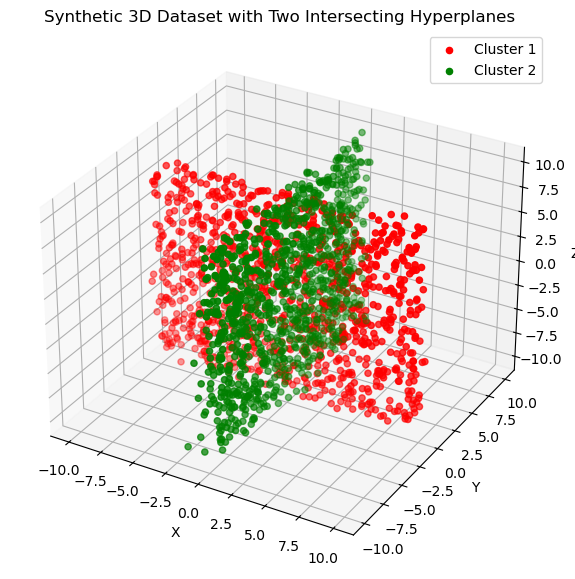

(2000, 3)

In [4]:
# Generating data for two intersecting hyperplanes in 3D space
#np.random.seed(0)

# Parameters
n_points_per_cluster = 1000
width = 0.5  # Width of the clusters

# Hyperplane 1 (XZ plane)
x1 = np.random.uniform(-10, 10, n_points_per_cluster)
z1 = np.random.uniform(-10, 10, n_points_per_cluster)
y1 = np.random.normal(0, width, n_points_per_cluster)  # small variation along y-axis

# Hyperplane 2 (YZ plane)
y2 = np.random.uniform(-10, 10, n_points_per_cluster)
z2 = np.random.uniform(-10, 10, n_points_per_cluster)
x2 = np.random.normal(0, width, n_points_per_cluster)  # small variation along x-axis

# Combine clusters
cluster1 = np.vstack([x1, y1, z1]).T
cluster2 = np.vstack([x2, y2, z2]).T

# Plot the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], color='r', label='Cluster 1')
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2], color='g', label='Cluster 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Synthetic 3D Dataset with Two Intersecting Hyperplanes")
ax.legend()

plt.show()

# Output the data for further usage
data = np.vstack([cluster1, cluster2])
data.shape


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# I do the scaler fitting on the training data only
#on the training test I do fit and transform simultaneously
DATA = scaler.fit_transform(data)

In [82]:
model = myCluster(DATA, 6, 1)

found model


found model
Finished for dim 1
found model
Finished for dim 2


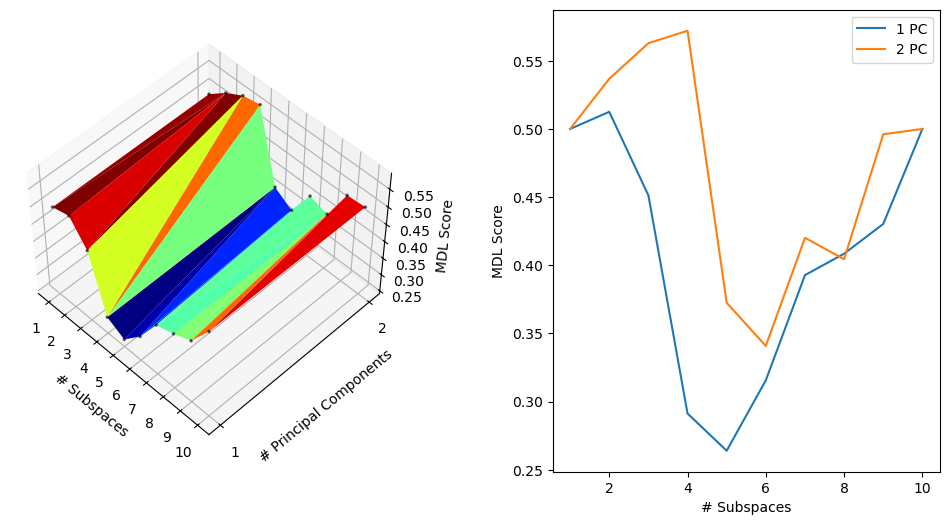

In [19]:
model = myCluster.search_best_cluster(DATA, 10, 2)

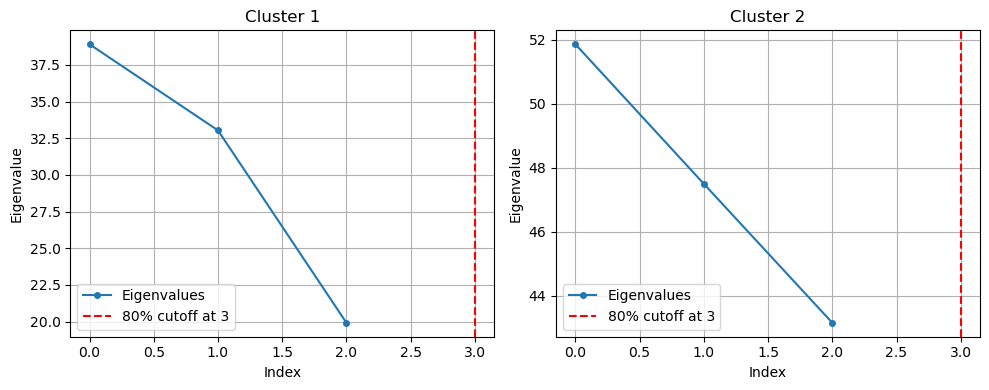

In [9]:
model.plot_elbow_plots_with_cutoff(2, 2)

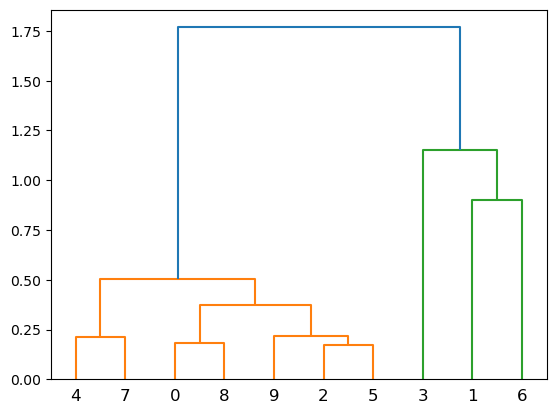

In [20]:
model.plot_dendrogram(truncate_mode="level" ,p=3)

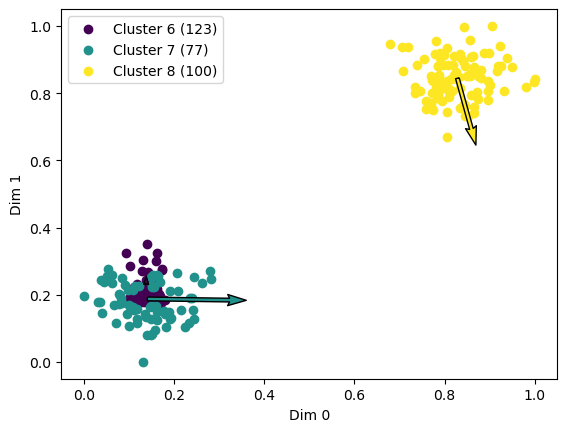

In [87]:
model.plot_2d_scatter(0,1,6,7,8, vectors=True)

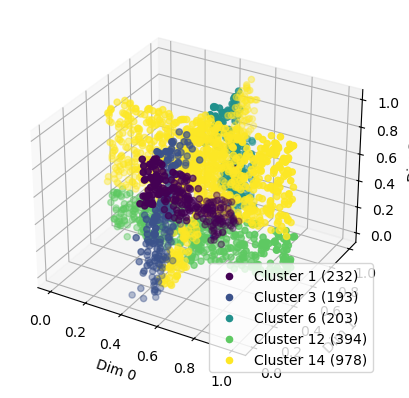

In [23]:
model.plot_3d_scatter(0,1,2,1, 3, 6, 12, 14, vectors=True)

In [22]:
print(model.mdl_info())

MDL for compression hierarchy
----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]-->0.5
[0, 1, 3, 4, 6, 7, 8, 9, 10]   -->0.43031110613157353
[1, 3, 4, 6, 7, 9, 10, 11]      -->0.4085079688081946
[1, 3, 6, 9, 10, 11, 12]         -->0.3927544403665718
[1, 3, 6, 11, 12, 13]            -->0.31560626515680584
[1, 3, 6, 12, 14]               -->0.2639530448357226
[1, 3, 6, 15]                  -->0.2912461440908834
[3, 15, 16]                     -->0.45125728081139216
[15, 17]                        -->0.5125691515465717
[18]                           -->0.5
None


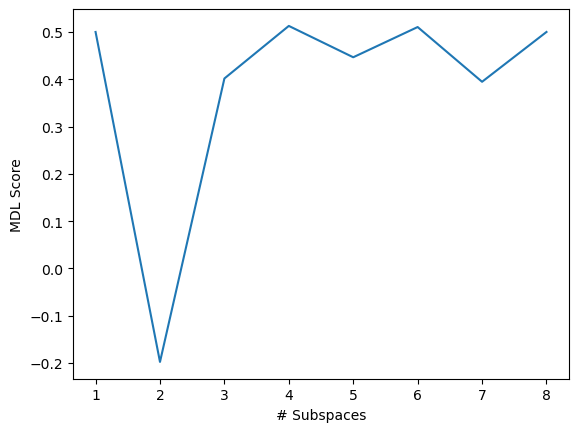

In [150]:
model.plot_mdl_stats()